# CNN (Convolutional Neural Networks)
* 합성곱 신경망
* 이미지나 영상 데이터를 처리할 경우 쓰이는 딥러닝 모델

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

### MINIST 데이터베이스
##### Modified National Institute of Standards and Technology database
* 손으로 쓴 숫자들로 이루어진 대형 데이터베이스
* 다양한 화상 처리 시스템을 트레이닝 하기 위해 사용됨
* 60,000개의 트레이닝 이미지와 10,000개의 테스트 이미지가 포함

In [11]:
# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

In [12]:
# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

Text(0.5, 1.0, 'Training Data Sample')

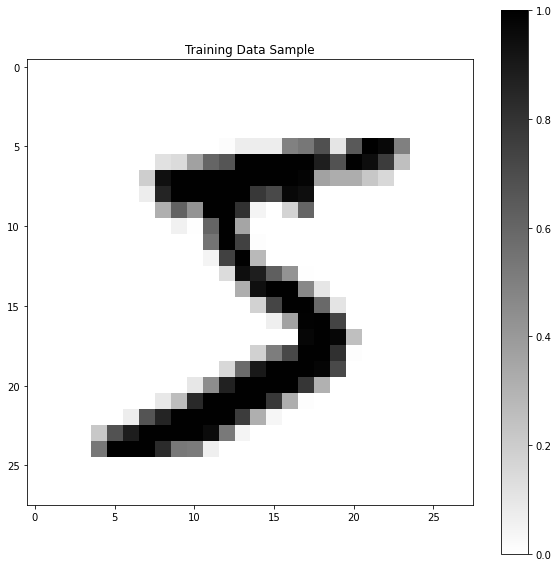

In [18]:
# 첫 번째 샘플 데이터를 출력
plt.figure(figsize=(10, 10))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.title("Training Data Sample")

# 이미지를 png파일로 저장하고 싶다면, 아래의 주석을 풀어주세요.
# plt.savefig("sample1.png")

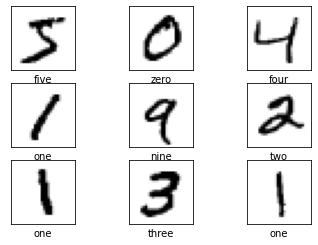

In [21]:
# 9개의 학습용 샘플 데이터를 출력
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
# 이미지를 png파일로 저장하고 싶다면, 아래의 주석을 풀어주세요.
# plt.savefig("sample2.png")

## 모델 구현
### Concolutional layer 만들기
  - 3x3 filter(=(3,3)) 를 32개 쌓는다. 여기서 activation(활성화 함수) 은 relu 이고, input 의 shape 는 MNIST 의 shape 인 28x28x1 이다.
  - 2x2 의 max pooling 을 한다.
  - 3x3 filter 를 64개 쌓는다. 여기서 activation(활성화 함수) 은 relu 이다.
  - 2x2 의 max pooling 을 한다.
  - 다시 3x3 filter 를 64개 쌓는다. 여기서 activation(활성화 함수) 은 relu 이다.

###### [참고] Pooling (MaxPooling2D)
- 특징을 뽑아내는 과정
- MaxPooling은 정해진 크기 안에서 가장 큰 값만 뽑아낸다.

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

###### 위의 코드는 아래와 같은 코드입니다.

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D((2,2), padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D((2,2), padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D((2,2), padding = 'SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

### [참고] 활성화 함수 (Activation Function)
* 노드에 입력된 값들을 비선형 함수에 통과 후, 다음 레이어로 전달할때 사용하는 함수
#### 대표적인 활성화 함수 : relu, Sigmoid
-----
* Sigmoid 함수
> * Logistic 함수라고도 불림
> * x 값에 따라 0~1의 값을 출력하는 S자형 함수
* Relu 함수
> * 경사 함수
> * Sigmoid와 tanh가 갖는 Gradient Vanishing (기울기 소실) 문제를 해결하기 위한 함수

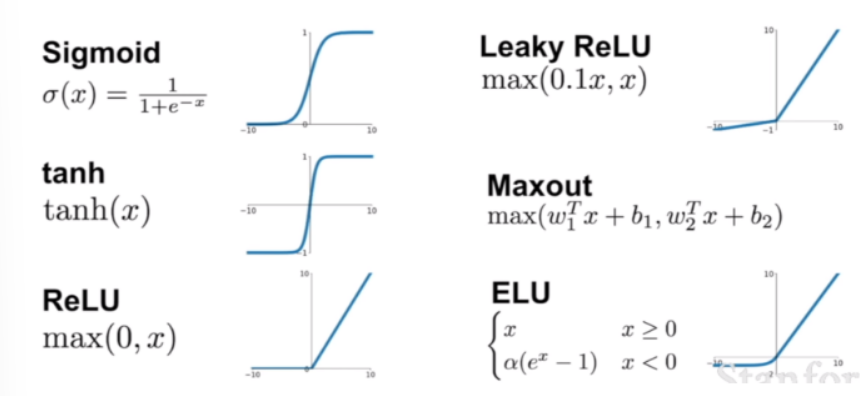

In [25]:
# CNN 모델 구조를 출력합니다.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [29]:
# CNN 모델의 학습 방법을 설정합니다.
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [30]:
# 학습을 수행합니다. 
history = model.fit(train_images, train_labels, epochs = 20, batch_size = 512)

Epoch 1/20
118/118 [==============================] - 14s 115ms/step - loss: 0.5045 - accuracy: 0.8627
Epoch 2/20
118/118 [==============================] - 16s 135ms/step - loss: 0.1073 - accuracy: 0.9677
Epoch 3/20
118/118 [==============================] - 16s 138ms/step - loss: 0.0745 - accuracy: 0.9774
Epoch 4/20
118/118 [==============================] - 17s 144ms/step - loss: 0.0587 - accuracy: 0.9822
Epoch 5/20
118/118 [==============================] - 17s 147ms/step - loss: 0.0454 - accuracy: 0.9861
Epoch 6/20
118/118 [==============================] - 17s 145ms/step - loss: 0.0408 - accuracy: 0.9875
Epoch 7/20
118/118 [==============================] - 17s 146ms/step - loss: 0.0342 - accuracy: 0.9894
Epoch 8/20
118/118 [==============================] - 17s 140ms/step - loss: 0.0304 - accuracy: 0.9904
Epoch 9/20
118/118 [==============================] - 18s 155ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 10/20
118/118 [==============================] - 17s 145ms/step - l

In [34]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0271 - accuracy: 0.9913 - 1s/epoch - 4ms/step


In [35]:
print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))


Test Loss : 0.0271 | Test Accuracy : 0.9912999868392944
